#### [**NICOLAS CACHANOSKY**](http://www.ncachanosky.com) | Department of Economics | Metropolitan State University of Denver | ncachano@msudenver.edu

# A SIMPLE RAMSEY MODEL
---

This note illustrates how to code a simple Ramsey model in Python. The purpose of the note is to walk through Python applications, not to offer a detailed discussion of Ramsey model or to show best coding practices. The note also assumes familiarity with Ramsey model and a beginner experience with Python.

For a more complete and detailed discussion of Python applications see the material in [Quant Econ](https://quantecon.org/).

---

## TABLE OF CONTENTS
1. [Description of the model](#1.-DESCRIPTION-OF-THE-MODEL)
2. [The respresentative household](#2.-THE-REPRESENTATIVE-HOUSEHOLD)
3. [The Representative Firm](#3.-THE-REPRESENTATIVE-FIRM)
4. [Equilibrium](#4.-EQUILIBRIUM)
5. [The code](#5.-THE-CODE)

## 1. DESCRIPTION OF THE MODEL

A known issue with the Solow model is that the savings rate is exogenous (and constant). This means the ratio of consumption to income $Y/C$ is also constant. While the Solow model can be useful to highlight some features of long-run growth, this assumption also limits the applicability of this model. Yet, the Solow model can be interpreted as a specIal case of Ramsey model (or Ramsey-Kass-Koopmans model). Ramsey model can be considered as the building block of macro models with a household that optimizes its utility and, therefore, endogenously sets the savings rate.

This note presents a "simple" Ramsey model (it offers a simplified discussion, does not discuss shocks, and does not add other features). For a more complete and detailed discussion see an advanced macroeconomics textbook. 

The model is populated by a representative household that maximizes its utility and by a representative firm that maximizes its profits. The model assumes a competitive market (no monopoly power, agents are price takers, etc.) The household provides labor services to the firm in exchange of a wage. The wage can be used to consume goods or save and accumulate assets. The model assumes a closed economy with no government. Finally, the model is presented in continuous (rather than discrete) time. A "dot" on top of a variable denotes its instantaneous time-change $(\dot x (t) = \frac{\partial x}{\partial t})$

# 2. THE REPRESENTATIVE HOUSEHOLD

Assume a large number of identicial infinitely-lived households. Because these households are identical, we can use  a **representative** household to populate the model. The assumptions that this households are infinitely lived captures a continuum of generations. The representative household has $L(t)$ individuals with a population growth rate of $n$. Therefore, $L(t) = L(0) \cdot e^{nt}$

## 2.1. THE HOUSEHOLD UTILITY

The household utility $(U)$ is the present value of the utility (felicity function) of all household individuals $(u(c))$.

\begin{equation}
    U = \int_{0}^{\infty} u[c(t)] \cdot e^{nt} \cdot \underbrace{e^{-\rho t}}_{L(t)} \cdot dt = \int_{0}^{\infty} u[c(t)] \cdot e^{(n-\rho)t} \cdot dt
\end{equation}

where $\rho > 0$ is the time preference of the household individual and where $n -\rho >0$. Also, $u(c)$ is concave $(u^{'}(c) > 0, u^{''}(c) < 0)$ and satisfies the Inada conditions $(u^{'}(c) \to \infty \text{ as } c \to 0 \text{, and } u^{'}(c) \to 0 \text{ as } c \to \infty$.

The parameter $\rho$ can be interpreted as the time preference of the household or as capturing a discount of the future generation by the present generations. If $\rho = 1$, then present generation assigns equal "value" to the next generatio (i.e. parents with respect to their kids). If $\rho < 0$, then the present generation is altruistic and values the utility of the next generation more than their own.

## 2.2. THE HOUSEHOLD BUDGET CONSTRAINT

The household budget constrained is composed of assets $(\Lambda)$ and wages $(w)$. The non-consumed wage becames an increase in assets. At some period in time, assets can be negative, which means that in that period the household has a net debt. Assets have a rate of return of $r$. Therefore, the stock of assets increase by the return of the assets plus wages, and decrease by the amount of consumption. Since population growths at rate $n$, the change in household's assets can be represented as follows.

\begin{equation}
    \frac{d\Lambda}{dt} = r(t) \cdot \Lambda(t) + w(t)L(t) - C(t)
\end{equation}


Dividing by $L(t)$ we get the change in assets per capita $(a)$ (and dropping the $t$ variable for notation simplicity):

\begin{align}
    \dot{\left(\frac{A}{L} \right)} &= \frac{\dot{A}L - A \dot{L}}{L^2}                \\
    \dot{a} &= \frac{\dot{A}}{L} - \frac{A}{L}n                                        \\
    \dot{a} &= ra + w - c - na                                                         \\
    \dot{a} &= (r - n)a + w - c
\end{align}

To avoid the situation where the household borrows money indifenetely, the model also imposses a "no Ponzi game condition". Intuitively, at the end of the household life $(T)$, assets have to be at least zero $a(T) \geq 0$. A household may have debt at any point in time, but at the end of its lifetime all debts are paid. The present value of the assets have to be asymptotically nonnegative.

\begin{equation}
    \lim\limits_{t \to \infty} a(t) e^{-\tilde{r}(t)} \geq 0
\end{equation}

where $\tilde{r}(t) = \int_{0}^{t} (r(\tau) - n) d\tau$. This expression means that any moment $\tau \in (0, \infty)$, the present value of $a$ cannot be negative. Note that $\tilde{r}$ is taking into consideration the growht rate of the household as well $n$. In a more simple notation, this condition can be written as $\lim\limits_{t \to \infty} a(t) \geq 0$.

## 2.3. THE HOUSEHOLD OPTIMIZATION PROBLEM

The household is  facing a dynamic optimization problem. It needs to set the path of consumption that maximizes the present value of its life utility. The optimization problem can be described with the following equations (where $n - \rho > 0$).

\begin{align}
    \max_{c(t)} U &= \int_{t=0}^{\infty} u[c(t)] \cdot e^{-(n-\rho)t}    \\
    \text{subject to:}                                                   \\
    \dot{a} &= (r(t) - n)a(t) + w(t) - c(t)                              \\
    a(0) &= a_{0}                                                        \\
    \lim\limits_{t \to \infty}a(t) &\geq 0                               \\
    \text{transversality condition:}                                     \\
    \lim\limits_{t \to \infty} \mu(t) \cdot a(t) = 0
\end{align}

The optimization problem is given an initial asset value of $a_0$ and a terminal condition for which assets cannot be negative. Let $\mathscr{H}$ be the present-value Hamiltonian:

\begin{equation}
    \mathscr{H} = e^{-(\rho - n)t} \cdot u[c(t)] + \mu(t) \cdot \left[r(t) - n)a(t) + w(t) - c(t) \right] 
\end{equation}

where $\mu(t)$ is the present-value shadow price. Since the household faces an optimization problem at each moment $t$, the shadow price may vary over time as well. The "transversality condition" states that in the limit, either the shadow price or the assets have to be zero. 

The first-order-conditions (FOC) of the hamiltonian are:

\begin{align}
    \frac{\partial \mathscr{H}}{\partial c} &= e^{-(\rho - n)t} \cdot u'_{c} - \mu(t) = 0       \\
    \frac{\partial\mathscr{H}}{\partial\mu} &= (r(t) - n)a(t) + w(t) - c(t) = \dot{a}           \\
    \frac{\partial \mathscr{H}}{\partial a} &= - (r(t) - n)\cdot \mu (t) = \dot{\mu}(t)
\end{align}

Now we proceed to use the first equation to get $\dot{\mu}(t)$.

\begin{align}
    \mu(t)       &= e^{-(\rho - n)t} \cdot u'_{c} \\
    \dot{\mu}(t) &= -(\rho - n) \cdot e^{-(\rho - n)t} \cdot  u'_{c} + e^{-(\rho - n)t} \cdot u''_c \cdot \dot{c}
\end{align}    

Make now two substitutions: (1) The first FOC in the third FOC, and (2) this last derivative in the third FOC as well.

\begin{align}
    -[r(t) -n] \cdot \mu(t) &= -(\rho - n) \cdot e^{-(\rho - n)t} \cdot u'(c) + e^{-(\rho - n)t} \cdot u''(c) \cdot \dot{c}        \\[10pt]
    -[r(t) -n] \cdot e^{-(\rho - n)t} \cdot u'(c) &= e^{-(\rho - n)t} \left[-(\rho - n) \cdot u'(c) + u''(c) \cdot \dot{c} \right] \\[10pt]
    -[r(t) -n] \cdot u'(c) &= -(\rho - n) \cdot u'(c) + u''(c) \cdot \dot{c}                                                       \\[10pt]
    r(t) &= \rho - \frac{u''(c)\cdot c}{u'(c)} \cdot \frac{\dot{c}}{c}
\end{align}
    
The last equation is the **Euler equation**, which defines the path for $c$ given the rate of return $r(t)$. Recall that $u''(c)<0$ and therefore $\frac{u''(c)c}{u'(c)}>0$. The right-hand side of the equation can be interpreted as the "rate of return of consumption." Consumers would like to smooth consumption in time. Therefore, the rate of return $(r)$ has to be equal to the time preference $(\rho)$ minus the change of consumption over time. Or, put it differently, if $r = \rho$, then consumption will be flat. There is no opportunity to increase utility by moving consumption over time (extend a loan and postpone consumption or take a debt and advance consumption). Consumers will be willing to postpone consumption if $r$ is sufficiently above $\rho$. The required compensation to postpone consumption is the second term in the righ-hand side of the equation.

\begin{align}
    r &= \rho \to \frac{\dot{c}}{c} = 0 \\
    r &> \rho \to \frac{\dot{c}}{c} > 0 \text{    (saving today: postpone present consumption)} \\
    r &< \rho \to \frac{\dot{c}}{c} < 0 \text{    (consuming today: advance future consumption)}
\end{align}

The Euler equation also includes the elasticity of marginal utility: $\frac{u''(c)\cdot c}{u'(c)}$. For $r$ and $\frac{\dot{c}}{c}$ to be constant, this elasticity of marginal utility has to be constant. A common practice is to assume a CRRA (constant relative risk aversion) utility function that depicts constant intertemporal elasticity of substitution (CIES).

\begin{equation}
    u(c) = \frac{c^{1-\theta}-1}{1-\theta}
\end{equation}

where $\theta > 0$ is the coefficient of relative risk aversion. The $1 - \theta$ denominator assures the function will keep its desired properties of the function $(u'>0, u''<0)$ even if $\theta > 1$ (see below). The inclution of the term $-1/(1-\theta)$ is for convenience; when $\theta \to 1$ then the CRRA function becomes $(u(c) = log(c))$. Consider now the first and second derivative of the CRRA function and the elasticity of substitution $(\sigma)$.

\begin{align}
    u'(c)  &= c^{-\theta} > 0                      \\
    u''(c) &= -\theta \cdot c^{-(\theta + 1)} < 0  \\
    \sigma &= \left[ \frac{u''(c) \cdot c}{u'(c)} \right]^{-1} = \left[\frac{\theta \cdot c^{-(\theta + 1)} \cdot c}{c^{-\theta}} \right]^{-1} = \frac{1}{\theta}
\end{align}

Then, the Euler equation from the household maximization problem becomes

\begin{align}
    r(t) &= \rho - \frac{u''(c)\cdot c}{u'(c)} \cdot \frac{\dot{c}}{c} \\
    r(t) &= \rho - \theta \cdot \frac{\dot{c}}{c}                      \\
\end{align}

We can rewrite the Euler equation to more conveniently depict the consumption path that maximizes the household utility.

\begin{equation}
    \frac{\dot{c}}{c} = \frac{1}{\theta} \cdot \left(r(t) - \rho \right)
\end{equation}

This is one of the two equations that describes Ramsey model. The second equation is derived from the firms profit maximization problem (next section).

---

The following code plots the utility function for different levels of $\theta$. The function also allows for $\theta = 1$, in such case the utility function becomes the log of consumption.

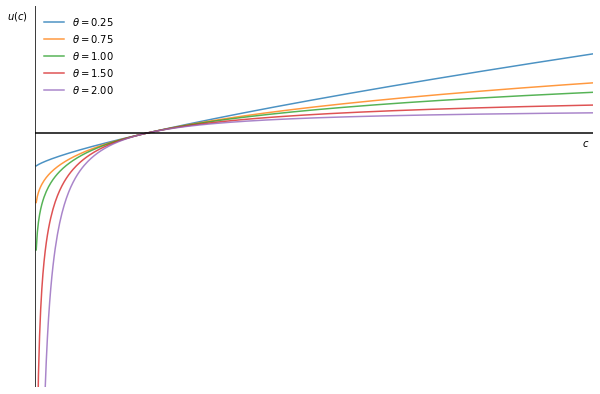

In [8]:
"1|IMPORT PACKAGES"
import numpy as np              # Package for scientific computing with Python
import matplotlib.pyplot as plt # Matplotlib is a 2D plotting library


"2|DEFINE PARAMETERS AND ARRAYS"
# PARAMETERS
size    = 5        # Model domain
steps   = size*100    # Number of "dots" in the domain

# ARRAY
c = np.linspace(0, size, steps) # Create array of consumption


"3|DEFINE UTILITY FUNCTION"
# Production function
def u(x, CRRA):
    if CRRA == 1:
        u = np.log(x)
    else:
        u = ((x)**(1-CRRA)-1)/(1-CRRA)
    return u


"4|CALCULATE UTILITY FUNCTIONS FOR DIFFERENT VALUES OF THETA"
theta = [0.25, 0.75, 1, 1.5, 2]

# Ignore c[0] = 0 to avoid dividing by zero
u1 = u(c[1:], theta[0])
u2 = u(c[1:], theta[1])
u3 = u(c[1:], theta[2])
u4 = u(c[1:], theta[3])
u5 = u(c[1:], theta[4])


"5|PLOT UTILITY FUNCTIONS"
### AXIS RANGE
v = [0, size, -10, 5]    
### BUILD PLOT AND POPULIATE WITH LOCI LINES
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(c[1:], u1, alpha = 0.8, label = r'$\theta=%.2f$' %theta[0])
ax.plot(c[1:], u2, alpha = 0.8, label = r'$\theta=%.2f$' %theta[1])
ax.plot(c[1:], u3, alpha = 0.8, label = r'$\theta=%.2f$' %theta[2])
ax.plot(c[1:], u4, alpha = 0.8, label = r'$\theta=%.2f$' %theta[3])
ax.plot(c[1:], u5, alpha = 0.8, label = r'$\theta=%.2f$' %theta[4])
### AXIS
ax.axhline(0, color = 'k') # Add horizontal axis
ax.axvline(0, color = 'k') # Add vertical axis
ax.yaxis.set_major_locator(plt.NullLocator())                # Hide ticks
ax.xaxis.set_major_locator(plt.NullLocator())                # Hide ticks
### TEXT 
plt.text(size-0.10, -0.5, r'$c$', color = 'k') # x-axis label
plt.text(    -0.25,  4.5, r'$u(c)$')           # y-axis label
# SETTINGS
plt.box(False)                                               # Hide axis
plt.legend(loc=0, frameon=False)
plt.axis(v)
plt.show()


# 3. THE REPRESENTATIVE FIRM

The representative firm uses a labor-technology augmenting production function $(Y = F(K; AL)$ with constant returns to scale (CRS). The production function depicts the typical properties of diminishing marginal returns and the Inada conditions. Technology $(A)$ grows at rage $g$: $A(t) = A(0)\cdot e^{gt}$.

In terms of effective labor $(AL)$, and  normalizing the price of the good to one $(p = 1)$, the profit of the firm becomes (where the $"\hat{}"$ symbol denotes the variable is in per effective labor units):

\begin{equation}
    \hat{\pi} = f(\hat{k}) - R \hat{k} - \hat{w}
\end{equation}

The rate of return on capital equals the gross rate of return $(R)$ minus the depreciation rate $(\delta)$: $r = R - \delta$. In this model there is no intertermporal optimization. The firm rents capital from the household one period at the time.

The FOC for the firm with respect to capital per effective unit of labor utilization is: 

\begin{equation}
    \frac{\partial \pi}{\partial \hat{k}} = f'(\hat{k}) - R = 0
\end{equation}

In equilibrium the firm's profit is zero, therefore:

\begin{align}
    \hat{w} &= f(\hat{w}) - R\hat{k}       \\
    \hat{w} &= f(\hat{w}) - (r + \delta)k
\end{align}

# 4. EQUILIBRIUM

In equilibrium, the assets owned by the household coincide with the capital per unit of labor. Recall that in this model households own the capital that is rented to the firms. Also, note that assets $(a)$ are expressed in per labor terms, while $(k)$ is expressed in per effective labor. Therefore: $a = Ak$. Then:

\begin{align}
    \dot{a}                      &= ra + w - c - na                          \\[5pt]
    \dot{(Ak)}                   &= r \cdot Ak + Aw - Ac - n \cdot Ak        \\[5pt]
    \dot{A}k + A \dot{k}         &= r \cdot Ak + Aw - Ac - n \cdot Ak        \\[5pt]
    \frac{\dot{A}}{A}k + \dot{k} &= rk + w - c - nk                          \\[5pt]
    gk + \dot{k}                 &= rk + w - c - n    k                      \\[5pt]
    \dot{k}                      &= rk + f(k) - (r + \delta)k - c - (n + g)k \\[5pt]
    \dot{k}                      &= f(k) - c - (n + g + \delta)k
\end{align}

Knowing that $R = r + \delta$ and that $f'(k) = R + \delta$, then the two motion equations that model Ramsey model are:

\begin{cases}
    \frac{\dot{c}}{c} &= \frac{1}{\theta} \cdot (f'(k) - \delta - \rho) \\[10pt]
    \dot{k}           &= f(k) - c - (n + g + \delta)
\end{cases}

In equilibrium, $\hat{c} = 0$ and $\hat{k} = 0$. Assuming the equilibrium conditions, we can rewrite the first of Ramsey model equations as an equilibrium **value** of $\hat{k}$, and the second equation can be represented as $\hat{c}$ in terms of $\hat{k}$. First, assume the production following, $Y = A \cdot \left[K^{\alpha} (AL)^{1 - \alpha} \right] (\alpha \in (0, 1))$. In terms of effective labor: $\hat{y} = \hat{k}^{\alpha}$.

\begin{align}
    \hat{k} &= (\delta + \rho)^{1/\alpha}             \\
    \hat{c} &= \hat{k}^{\alpha} - (n + g + \delta) \cdot \hat{k}
\end{align}

From the second equation we can also derive the value of $\hat{k}$ that maximizes $\hat{c}$; the *golden-rule*.

\begin{align}
    \hat{c}                                   &= \hat{k}^{\alpha} - (n + g + \delta) \cdot \hat{k}                   \\[10pt]
    \frac{\partial \hat{c}}{\partial \hat{k}} &= \alpha \cdot \hat{k}^{-(1 - \alpha)} - (n + g + \delta) \hat{k} = 0 \\[8pt]
    \hat{k}^{*}_{g}                           &= \left(\frac{\alpha}{n + g + \delta} \right)^{\frac{1}{1-\alpha}}
\end{align}

The model has one stable saddle path that converges to equilibrium. This saddle-path is unstable, if the model is outside this path by the smallest distance, then the model diverges away from equilibirum.

# 5. THE CODE

The Python code has the following structure. Following the above discussion, after importing the required packages and defining parameters and arrays, the equilibrium, gold values, and _loci_ lines are calculated. The code plots two graphs. 

The first one shows the _loci_ lines with five sample paths (in red). Each one of these sample paths depicts the unstable dynamics of the model. The second graph plots the stable-path (in blue). 

## 5.1 ESTIMATING THE STABLE-PATH

A common way to estimate the stable-path is with a "shooting" methodology. This approach shoots a number of paths until it finds one that is close enough the actual stable path. Let $\tilde{k}$ and $\tilde{c}$ denote estimated values of the path produced by the "shooting" algorithm.

This note uses a **simple** code and methodology to illustrate this type of numerical method. It is not intended to be the more efficient one. The stable path is estimated in two halves. One estimation for the stable path section to the left of the equilirium point, and another estimation for the stable path to the right of the equilibrium point. These two estimations are coded as two different functions: (1) backward shoot and (2) forward shoot respectively. Alternatively, one simple "shoot" function could include both initial locations. 

These type of iterations can be time consuming depending on how many shoots the code is going to perform (which depends on how big a correction is when a shoot misses the steady-state), what the tolerance level is, etc. A more sofisticated code could reduce the number of attempts and save computational time.

Since we know that is very unlikely that our "shoots" will exactly hit the steady state $(k^*, c(k^*)$, we need to define a success criteria. The success criteria is when the shoots hits close enough to the target. We need to define circle around the equilibrium that plays the role of the tolerance level. Once we find a "shoot" that hits inside this circle, the shoots is considered a success and an approximation good enough for the estimation purposes.

The distance of a point to the steady-state is: $distance = \sqrt[2]{(\tilde{k} - k^*)^2 + (\tilde{c} - c^*)^2}$, where $\tilde{k}, \tilde{c}$ are the shoot estimations.

The shooting functions have two inputs. The initial level of $k_0$ and a "step" size. The "step" size is how big the correction of the initial shoot will be after it misses the tolerance level (the target). Given $k_0$, the function estimates a level of $c(k_0)$ (the first shoot). If the shoot misses the target, then the algorithm performs a correction to the initial level of $c_0$ and shoots again. This sequence repeats until the shoot hits the target.  

### 5.1.1 "FORWARD" SHOOT
The first shoot of the forward shoot function is located one step below the _loci_ function. We know is very likely that this initial shoot is too high, and therefore the path will go above $c^*$. The loop has two break points to define a succesfull shoot. The first one is if the path produces a point $(k, c)$ inside the tolerance distance from the steady-state (the above discussion). The second one is the path produces a value of $\tilde{k} > k_*$. This break point is in place because the step size (how far the new shoot starting point moves) is a fixed amount without a correction or feedback mechanism. It is possible, then, that after missing the target the next iteration starts at a value of $c$ that is too low. Such path may still be an estimation good enough even if it does not satisfy the tolerance level (for the purposes of this notebook, this is enough). 

There is a third break, which is a cap on the number of iterations the loop can perform. When building a code like this, this type of break can help avoid a mistake that sends the code into an infinite loop.

If the path produces a value of $\tilde{c} > c^*$, then the loop resets and starts again from a new initial $c_0$ that is located one "step size" below the previous shoot.

### 5.1.2 "BACKWARD" SHOOT

The backward shoot function follow a similar structure than the forward shoot. Yet, because the starting point is different, the break points have to be modified. However, there is a difference in the starting point. Rather than starting at the _loci_ level given the initial on step above $c_0 = c(k_0)$, the code starts with $c_0 = c(k_0)\cdot 1.5$. This is an example of an easy way to save some computational power. Looking at the first figure (the unstable paths) we know that the level of consumption of the stable path will be several steps above $c(k_0)$. Therefore, we can save computation time by avoiding shoot attempts between $c(k_0)$ and $c(k_0)\cdot 1.5$. 

The forward shoot loop has two stop points of success. The first one is if the shoot produces a point inside the tolerance circle. The second one is if the path produces a value of $\tilde{k} < k^*$ (for similar reasons than the forward shoot break). There is also the third break built on the number of iterations the loop will perform. Since the starting point is farther away from the equilibrium point, this break has a larger limit of iterations than the forward shoot loop.

If the shoot produces a value of $\tilde{c} < c^*$, then the code resets and calculates a new shoot with a new $c_0$ one step above the previous shoot.

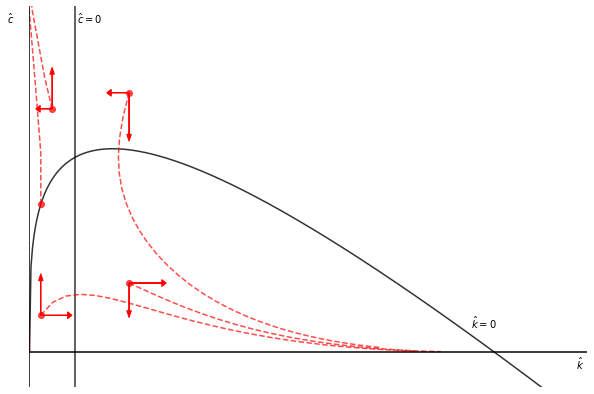

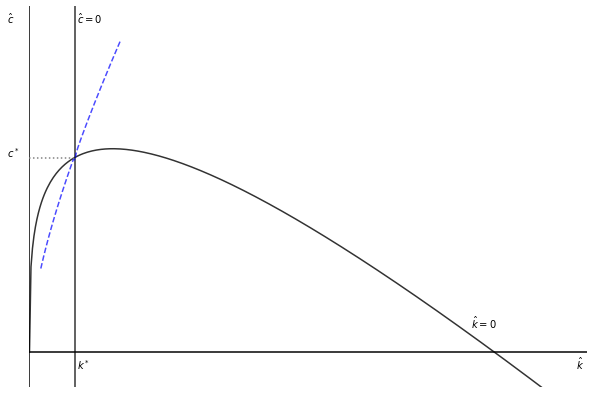

In [4]:
"1|IMPORT PACKAGES"
import numpy as np              # Package for scientific computing with Python
import matplotlib.pyplot as plt # Matplotlib is a 2D plotting library

"2|DEFINE PARAMETERS AND ARRAYS"
# PARAMETERS
k_size  =  150        # Model domain
steps   =  k_size*100 # Number of "dots" in the domain
alpha   =  0.30       # Output elasticity of capital
delta   =  0.35       # Depreciation rate
rho     =  0.35       # Time preference
n       =  0.05       # Population growth rate
g       =  0.05       # TFP growth rate
theta   =  0.8        # Coefficient or Relative Risk Aversion
# ARRAY
k_array = np.linspace(0, k_size, steps) # Create array of k


"3|DEFINE FUNCTIONS"
# PRODUCTION FUNCTION
def y(k):
    y = k**alpha
    return y

# MARGINAL PRODUCT OF CAPITAL
def y_prime(k):
    y_prime = alpha*k**(alpha-1)
    return y_prime

# CONSUMPTION
def consumption(k):
    c = y(k) - (n + g + delta)*k
    return c

# MOTION FUNCTION OF CONSUMPTION
def cdot(k, c):
    cdot = 1/theta * (y_prime(k) - delta - rho) * c
    return cdot

# MOTION FUNCTION OF CAPITAL
def kdot(k, c):
    kdot = y(k) - c - (n + g + delta)*k 
    return kdot
    

"4|CALCULATE STEADY STATE AND GOLD VALUES"
# STEADY STATE VALUES
k_star = (delta + rho)**(1/alpha)
c_star = consumption(k_star)
y_star = y(k_star)
s_star = (y_star - c_star)/y_star

# GOLD VALUES
k_gold = (alpha/(n+g+delta))**(1/(1-alpha))
c_gold = consumption(k_gold)
y_gold = y(k_gold)
s_gold = (y_gold - c_gold)/y_gold


"5|CALCULATE LOCI FUNCTIONS"
k_loci = k_star
c_loci = consumption(k_array)


"6|CALCULATE SAMPLE PATHS"
k00, k01, k02 = k_star*0.25, k_star*0.50, k_star*2.2
c0 = [consumption(k00)*0.25, consumption(k00), c_star*1.25,
      consumption(k01)*0.40, consumption(k01)*1.50]

def sample_path(k0, c0, n):
    path = np.zeros(shape=(n, 2))
    path[0, 0] = k0
    path[0, 1] = c0
    
    for j in range(n-1):
        if path[j,0] < 0: # Stop if motion goes off-chart
            break
        else:
            path[j+1, 0] = path[j, 0] + kdot(path[j, 0], path[j, 1])*0.25
            path[j+1, 1] = path[j, 1] + cdot(path[j, 0], path[j, 1])*0.25
    return path

path1 = sample_path(k00, c0[0], 30)
path2 = sample_path(k00, c0[1], 30)
path3 = sample_path(k01, c0[2], 30)
path4 = sample_path(k02, c0[3], 30)
path5 = sample_path(k02, c0[4], 30)


"7|PLOT RAMSEY MODEL WITH SAMPLE PATHS"
# Value of k such that c = 0
k_zero = (1/(n + g + delta))**(1/(1-alpha))
# Axis range
y_max = np.max(c_loci)*1.7
x_max = k_zero*1.2
v = [0, x_max, -0.1, y_max]                        

### BUILD PLOT AND POPULIATE WITH LOCI LINES
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(k_array, c_loci, color="K", alpha = 0.8)
ax.axvline(k_loci, color="K", alpha = 0.8)
### SAMPLE PATHS
ax.plot(path1[:,0], path1[:,1], "r--", alpha = 0.7)
ax.plot(path2[:,0], path2[:,1], "r--", alpha = 0.7)
ax.plot(path3[:,0], path3[:,1], "r--", alpha = 0.7)
ax.plot(path4[:,0], path4[:,1], "r--", alpha = 0.7)
ax.plot(path5[:,0], path5[:,1], "r--", alpha = 0.7)
### ADD DOTS AT BEGINNING OF SAMPLE PATHS
plt.plot(k00, c0[0], 'ro', alpha = 0.7)
plt.plot(k00, c0[1], 'ro', alpha = 0.7)
plt.plot(k01, c0[2], 'ro', alpha = 0.7)
plt.plot(k02, c0[3], 'ro', alpha = 0.7)
plt.plot(k02, c0[4], 'ro', alpha = 0.7)
### ADD MOTION ARROWS
plt.arrow(k00, c0[0], 0, 0.10, head_width=0.03,head_length=0.02,fc='r',ec='r')
plt.arrow(k00, c0[0], 0.18, 0, head_width=0.02,head_length=0.03,fc='r',ec='r')
plt.arrow(k01, c0[2], 0, 0.10, head_width=0.03,head_length=0.02,fc='r',ec='r')
plt.arrow(k01, c0[2],-0.08, 0, head_width=0.02,head_length=0.03,fc='r',ec='r')
plt.arrow(k02, c0[3], 0,-0.08, head_width=0.03,head_length=0.02,fc='r',ec='r')
plt.arrow(k02, c0[3], 0.22, 0, head_width=0.02,head_length=0.03,fc='r',ec='r')
plt.arrow(k02, c0[4], 0,-0.12, head_width=0.03,head_length=0.02,fc='r',ec='r')
plt.arrow(k02, c0[4],-0.12, 0, head_width=0.02,head_length=0.03,fc='r',ec='r')
### AXIS
ax.axvline(0, color="k")                                     # y-axis
ax.axhline(0, color="k")                                     # x-axis
ax.yaxis.set_major_locator(plt.NullLocator())                # Hide ticks
ax.xaxis.set_major_locator(plt.NullLocator())                # Hide ticks
### TEXT 
plt.text(x_max*0.98, -0.05      , r'$\hat{k}$', color = 'k') # x-axis label
plt.text(-0.15 , y_max*0.95     , r'$\hat{c}$', color = 'k') # y-axis label
plt.text(k_star*1.05, y_max*0.95, r'$\hat{c}=0$', color = "k")
plt.text(k_zero*0.95, 0.07      , r'$\hat{k}=0$', color = "k")
# SETTINGS
plt.axis(v)
plt.box(False)                                               # Hide axis
plt.show()


"8|STABLE-PATH: FORWARD AND BACKWARD SHOOTING"
def forward_shoot(k0, step):
    # Set conditions for initial shoot
    tol   = 1.0e-10
    c0    = consumption(k0) - step
    error = np.abs(((k0 - k_star)**2 + (c0 - c_star)**2)**0.5)
    path      = np.zeros(shape=(1, 2))
    path[0,0] = k0
    path[0,1] = c0

    # Start loop (forward shoot)
    count = 0
    while 1:
        k1 = path[count, 0]
        c1 = path[count, 1]
        k2 = k1 + kdot(k1, c1)*0.1
        c2 = c1 + cdot(k1, c1)*0.1
        error = np.abs(((k2 - k_star)**2 + (c2 - c_star)**2)**0.5)
        path = np.append(path, [[k2, c2]], axis = 0)
        count = count + 1

        # Check if this is the stable-path
        if error < tol:
            break
        
        # Set up code break and reset the shoot
        if c2 > c_star:
            path = np.zeros(shape=(1, 2))
            c0 = c0 - step
            path[0,0] = k0
            path[0,1] = c0
            count = 0
        
        # Break code when k < k*
        if k2 > k_star:
            break
        
        # Put a limit of iterations to the code
        if count > 100:
            break
       
    return path


def backward_shoot(k0, step):
    # Set conditions for initial shoot
    tol   = 1.0e-10
    c0    = consumption(k_gold) * 1.5
    error = np.abs(((k0 - k_star)**2 + (c0 - c_star)**2)**0.5)
    path      = np.zeros(shape=(1, 2))
    path[0,0] = k0
    path[0,1] = c0

    # Start loop (forward shoot)
    count = 0
    while 1: # Infinite loop with break conditions inside
        k1 = path[count, 0]
        c1 = path[count, 1]
        k2 = k1 + kdot(k1, c1)*0.01
        c2 = c1 + cdot(k1, c1)*0.01
        error = np.abs(((k2 - k_star)**2 + (c2 - c_star)**2)**0.5)
        path = np.append(path, [[k2, c2]], axis = 0)
        count = count + 1

        # Check if this is the stable-path
        if error < tol:
            break
        
        # Set up code break and reset the shoot
        if c2 < c_star:
            path = np.zeros(shape=(1, 2))
            c0 = c0 + step
            path[0,0] = k0
            path[0,1] = c0
            count = 0
        
        # Break code when k < k*
        if k2 < k_star:
            break
        
        # Put a limit of iterations to the code
        if count > 400:
            break
       
    return path

stable_L = forward_shoot(k00, 0.000001)
stable_R = backward_shoot(k_star*2.00, 0.000001)



"9|PLOT RAMSEY MODEL WITH STABLE PATH"
# Value of k such that c = 0
k_zero = (1/(n + g + delta))**(1/(1-alpha))
# Axis range
y_max = np.max(c_loci)*1.7
x_max = k_zero*1.2
v = [0, x_max, -0.1, y_max]                        

### BUILD PLOT AND POPULIATE WITH LOCI LINES
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(k_array, c_loci, color="K", alpha = 0.8)
ax.axvline(k_loci, color="K", alpha = 0.8)
### STABLE PATH
ax.plot(stable_L[:,0], stable_L[:,1], "b--", alpha = 0.7)
ax.plot(stable_R[:,0], stable_R[:,1], "b--", alpha = 0.7)
### AXIS
ax.axvline(0, color="k")                                     # y-axis
ax.axhline(0, color="k")                                     # x-axis
ax.yaxis.set_major_locator(plt.NullLocator())                # Hide ticks
ax.xaxis.set_major_locator(plt.NullLocator())                # Hide ticks
### TEXT 
plt.text(x_max*0.98, -0.05      , r'$\hat{k}$', color = 'k') # x-axis label
plt.text(-0.15 , y_max*0.95     , r'$\hat{c}$', color = 'k') # y-axis label
plt.text(k_star*1.05, y_max*0.95, r'$\hat{c}=0$', color = "k")
plt.text(k_zero*0.95, 0.07      , r'$\hat{k}=0$', color = "k")
plt.text(k_star*1.05, -0.05     , r'$k^*$'      , color = 'k')
plt.text(-0.15, c_star          , r'$c^*$'      , color = 'k')
ax.axhline(c_star, 0, k_star/v[1], linestyle=":", color = "grey")
# SETTINGS
plt.axis(v)
plt.box(False)                                               # Hide axis
plt.show()